['Gazole' 'SP95' 'E85' 'E10' 'SP98' 'GPLc' nan]
val MAX Gazole [7.765, 7.765, 7.765]
val MIN Gazole [0.644, 0.669, 0.69]
val MAX SP95 [7.809, 7.769, 2.839]
val MIN SP95 [0.745, 0.775, 0.779]
val MAX E85 [9.919, 2.026, 1.999]
val MIN E85 [0.019, 0.099, 0.475]
val MAX E10 [7.75, 7.708, 4.775]
val MIN E10 [0.709, 0.71, 0.72]
val MAX SP98 [7.87, 7.829, 7.799]
val MIN SP98 [0.799, 0.805, 0.809]
val MAX GPLc [1.999, 1.98, 1.967]
val MIN GPLc [0.038, 0.25, 0.576]


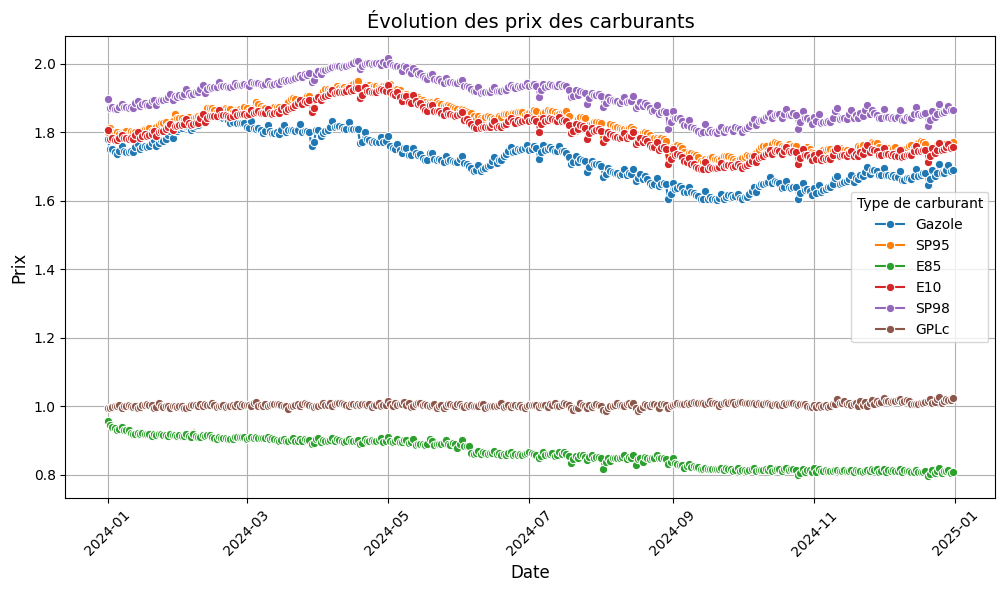

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

year = 2024
file_path = f"results/inputs_csv/PrixCarburants_annuel_{year}.csv"

if not os.path.exists(file_path):
    print(f"Le fichier {file_path} n'existe pas.")
else:
    df = pd.read_csv(file_path)

    df_prices = df[["maj", "nom", "valeur"]]
    df_prices["maj"] = pd.to_datetime(df_prices["maj"], format="%Y_%m_%d")
    
    # type carburant par dates
    print(df_prices["nom"].unique())
    list_carburant = df_prices["nom"].dropna().unique()
    for carburant in list_carburant:
        df_carburant = df_prices[df_prices["nom"]== carburant].sort_values(by=['valeur'])
        print(f"val MAX {carburant}", df_carburant.nlargest(3, 'valeur')['valeur'].tolist())
        print(f"val MIN {carburant}", df_carburant.nsmallest(3, 'valeur')['valeur'].tolist())
    
    # Tracer l'évolution des prix pour chaque type de carburant
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_prices, x="maj", y="valeur", hue="nom", marker="o")
    
    # Personnalisation du graphique
    plt.title("Évolution des prix des carburants", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Prix", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Type de carburant")
    plt.grid(True)
    
    # Afficher le graphique
    plt.show()